In [1]:
cd C:\Users\User\Desktop\sem1_year4\fyp_thing

C:\Users\User\Desktop\sem1_year4\fyp_thing


In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

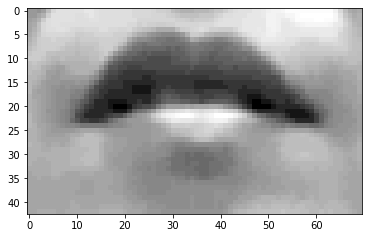

In [3]:
Datadirectory = "new_dataset/Training" ##Training 
Classes = ["closed_mouth","open_mouth"]
for category in Classes:
    path = os.path.join(Datadirectory, category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

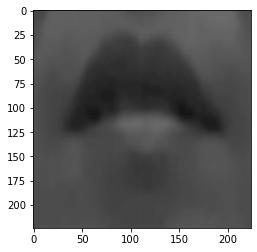

In [4]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [5]:
## Training Data preprocessing

In [5]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [6]:
create_training_Data()
print(len(training_Data))

4000


In [7]:
import random
random.shuffle(training_Data)

In [8]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size, 3)

In [9]:
X.shape

(4000, 224, 224, 3)

In [10]:
## normalize data
X= X/255

In [11]:
Y = np.array(y)

In [13]:
import pickle
pickle_out = open("X.pickle_mob","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle_mob","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [14]:
## CNN 

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
model = tf.keras.applications.ResNet50()

In [14]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [15]:
base_input = model.layers[0].input 

In [16]:
base_output = model.layers[-2].output

In [17]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation("sigmoid")(final_output)

In [18]:
model1 = keras.Model(inputs = base_input, outputs = final_output)

In [19]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [20]:
model1.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [21]:
import time

In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=6
)

N = 20
st=time.time()
history=model1.fit(X,Y, epochs = N, callbacks=[early_stopping], validation_split = 0.1)
end=time.time()
d=end-st
print(d)

Epoch 1/20
113/113 [==============================] - 1255s 11s/step - loss: 0.2657 - accuracy: 0.9122 - val_loss: 19.3979 - val_accuracy: 0.5000
Epoch 2/20
113/113 [==============================] - 1246s 11s/step - loss: 0.0760 - accuracy: 0.9731 - val_loss: 5.3460 - val_accuracy: 0.5000
Epoch 3/20
113/113 [==============================] - 1238s 11s/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 1.1183 - val_accuracy: 0.5000
Epoch 4/20
113/113 [==============================] - 1240s 11s/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 2.1083 - val_accuracy: 0.4950
Epoch 5/20
113/113 [==============================] - 1242s 11s/step - loss: 0.0505 - accuracy: 0.9811 - val_loss: 2.2199 - val_accuracy: 0.5000
Epoch 6/20
113/113 [==============================] - 1242s 11s/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 1.2810 - val_accuracy: 0.5150
Epoch 7/20
113/113 [==============================] - 1243s 11s/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 1.3065 - val_a

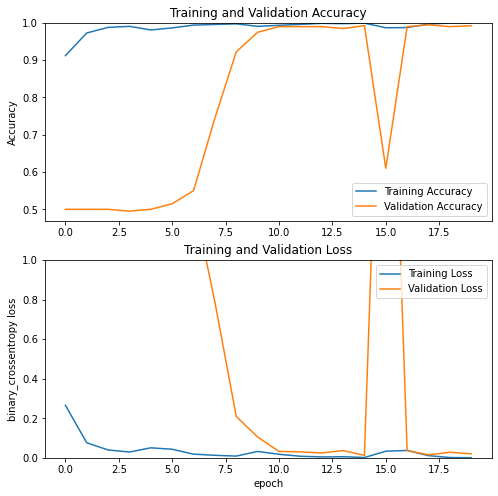

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('binary_crossentropy loss')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [26]:
model1.save('new_dataset/model_resnet50_es.h5')

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
